# This is a use case notebook showcasing the use of Matrice SDK for Tumor classification using our platform's classification models giving state-of-art results.

## Install Matrice SDK 

In [1]:
#!python -m pip install --upgrade --index-url https://test.pypi.org/simple/ --no-deps matrice_sdk

## Secret Keys Set-Up

This script provides a secure way to manage environment variables, especially useful for handling sensitive information like Matrice access keys.

### Prerequisites

- Python 3.x installed
- A JSON file named `secret.json` containing your secret key-value pairs

### Setup

Create a `secret.json` file in the same directory as the script with your sensitive data:

   ```json
   {
     "ENV": "production",
     "MATRICE_SECRET_ACCESS_KEY": "your_secret_key_here",
     "MATRICE_ACCESS_KEY_ID": "your_access_key_id_here"
   }

In [2]:
import os
import json

# Function to set environment variables from a JSON file
def set_env_variables_from_json(json_file):
    with open(json_file, 'r') as file:
        env_variables = json.load(file)
    
    for key, value in env_variables.items():
        os.environ[key] = value
        masked_value = '*' * (len(value) - 4) + value[-4:]
        print(f"Set {key} to {masked_value}")

# Specify the path to your JSON file
json_file_path = 'secret.json'

# Set the environment variables
set_env_variables_from_json(json_file_path)

# Function to get and mask environment variable values
def get_and_mask_env_variable(key):
    value = os.getenv(key)
    if value:
        masked_value = '*' * (len(value) - 4) + value[-4:]
        return masked_value
    return None

# Verify that the environment variables are set
print("ENV:", get_and_mask_env_variable('ENV'))
print("MATRICE_SECRET_ACCESS_KEY:", get_and_mask_env_variable('MATRICE_SECRET_ACCESS_KEY'))
print("MATRICE_ACCESS_KEY_ID:", get_and_mask_env_variable('MATRICE_ACCESS_KEY_ID'))


Set ENV to DEV
Set MATRICE_SECRET_ACCESS_KEY to *****************I7IT
Set MATRICE_ACCESS_KEY_ID to *****************ZEPK
ENV: DEV
MATRICE_SECRET_ACCESS_KEY: *****************I7IT
MATRICE_ACCESS_KEY_ID: *****************ZEPK


## Matrice SDK Initialization

This script initializes a session with the Matrice SDK and imports necessary modules.

### Prerequisites

- Python 3.x installed
- Matrice SDK installed
- Proper account credentials set up

### Setup

1. Ensure you have the Matrice SDK installed.
2. Make sure your environment variables are set correctly (refer to the previous environment variable management script if needed).

### Usage

1. Set your account number:
```python
account_number = '2276842692221978464767135'

In [3]:
import sys
account_number = '2276842692221978464767135'
parent_dir = os.path.abspath("..")
sys.path.append(parent_dir)
from matrice_sdk.session import Session
from matrice_sdk.projects import Projects
from matrice_sdk.dataset import Dataset
from matrice_sdk.models import Model
from matrice_sdk.deployment import Deployment
from matrice_sdk.inference_optim import InferenceOptimization
from matrice_sdk.model_prediction import ModelPrediction
from matrice_sdk.user import User

# Initialize session and projects
S = Session(account_number)
print("A Session has been initialized : " , S)

A Session has been initialized :  <matrice_sdk.session.Session object at 0x0000027BC4932C70>


## Credit Check Function for Matrice SDK

This script defines a function to check the credit balance for a Matrice account and displays the initial credit amount.

### Prerequisites

- Python 3.x installed
- Matrice SDK installed and properly set up
- Valid Matrice SDK account number

### Usage

1. Ensure your Matrice SDK session is initialized (refer to the previous SDK initialization script).

2. Run the script

In [4]:
import sys
def check_credit_deduction(account_number):
    U = User(S)
    resp, err, message = U.get_account_subscription(account_number)
    if err is not None:
        print(message)
        sys.exit(1)
    return resp["credits"] + resp["subCredits"]

# Replace with your account number
account_number = '2276842692221978464767135'
initial_credits = check_credit_deduction(account_number)
print(f"Initial credits: {initial_credits}")

Getting Auth bearer token...
Setting bearer token...
Initial credits: 8714725


## Project Management Script for Matrice SDK

This script manages project creation and storage for the Matrice SDK, using a JSON file to persist project information between sessions.

### What This Script Does

1. Manages environment variables using a JSON file.
2. Checks for an existing project or creates a new one.
3. Saves project information for future use.

### Prerequisites

- Python 3.x installed
- Matrice SDK installed and set up
- A initialized Matrice SDK session (variable `S`)

### How to Use

1. Ensure you have a `secret.json` file in the same directory as this script. If not, the script will create one.

2. Run the script

In [5]:
import os
import json
import pprint

# Function to load environment variables from a JSON file
def load_env_variables_from_json(json_file):
    if not os.path.exists(json_file):
        return {}
    
    with open(json_file, 'r') as file:
        env_variables = json.load(file)
    
    return env_variables

# Function to save environment variables to a JSON file
def save_env_variables_to_json(json_file, env_variables):
    with open(json_file, 'w') as file:
        json.dump(env_variables, file, indent=4)

# Function to create a project
def create_project():
    project_name = "Tumor Classification Use Case Final-3"
    input_type = "image"
    output_type = "classification"
    
    enabled_platforms = {
        "matrice": True,
        "android": False,
        "ios": False,
        "tpu": False,
        "intelCPU": False,
        "gcloudGPU": False
    }

    resp, error = S._create_project(project_name, input_type, output_type)
    pprint.pprint(resp)
    if error:
        print(f"Error: {error}")
        return None, None
    else:
        print(f"Project created with ID: {resp['_id']}")
        return resp['_id'], resp['name']

# Specify the path to your JSON file
json_file_path = 'secret.json'

# Load environment variables from JSON file
env_variables = load_env_variables_from_json(json_file_path)

# Check if project_id and project_name exist
project_id = env_variables.get('project_id')
project_name = env_variables.get('project_name')

if project_id and project_name:
    print("----------------------------")
    print(f"Project ID from JSON: {project_id}")
    print(f"Project Name from JSON: {project_name}")
    print("----------------------------")

    # Ask user if they want to create a new project
    create_new = input("Do you want to create a new project? (yes/no): ").strip().lower()
    
    if create_new == 'yes':
        project_id, project_name = create_project()
        if project_id and project_name:
            env_variables['project_id'] = project_id
            env_variables['project_name'] = project_name
            save_env_variables_to_json(json_file_path, env_variables)
else:
    project_id, project_name = create_project()
    if project_id and project_name:
        env_variables['project_id'] = project_id
        env_variables['project_name'] = project_name
        save_env_variables_to_json(json_file_path, env_variables)

print("----------------------------")
print(f"Project ID: {project_id}")
print(f"Project Name: {project_name}")
print("----------------------------")


Getting Auth bearer token...
Setting bearer token...
{'_id': '66c35f83c85178dde324b19c',
 '_idUserOwner': '660ce6afcee2186abc338745',
 'accountNumber': '2276842692221978464767135',
 'accountType': 'enterprise',
 'createdAt': '2024-08-19T15:06:43.444864721Z',
 'enabledPlatforms': {'android': False,
                      'gcloudGPU': False,
                      'intelCPU': False,
                      'ios': False,
                      'tpu': False},
 'inputType': 'image',
 'isDeleted': False,
 'isDisabled': False,
 'name': 'Tumor Classification Use Case Final-3',
 'outputType': 'classification',
 'updatedAt': '2024-08-19T15:06:43.444865944Z'}
Project created with ID: 66c35f83c85178dde324b19c
----------------------------
Project ID: 66c35f83c85178dde324b19c
Project Name: Tumor Classification Use Case Final-3
----------------------------


# Initialize a Project Instance for SDK usage

In [6]:
S.update_session(project_id)
P = Projects(S, project_name)
print("A Project instance has been initialized : ", P)

Getting Auth bearer token...
Setting bearer token...
A Project instance has been initialized :  <matrice_sdk.projects.Projects object at 0x0000027BC48AE160>



# Dataset Preprocessing Script for Tumor Classification

This script prepares a tumor classification dataset by organizing and splitting the data into train, validation, and test sets.

## What This Script Does

1. Organizes images into 'tumour' and 'no_tumour' categories.
2. Splits the dataset into train (70%), validation (20%), and test (10%) sets.
3. Creates a zip file of the processed dataset.

## Prerequisites

- Python 3.x installed
- Required Python libraries: `sklearn`, `shutil`
- A dataset with 'yes' (tumor) and 'no' (no tumor) subdirectories

## How to Use

1. Set the `dataset_dir` variable to the path of your original dataset:

   ```python
   dataset_dir = '/path/to/your/dataset'  # Replace with your dataset path
   ```

2. Run the cell.
   ```

## Script Workflow

1. Creates directories for train, test, and validation sets.
2. Splits and copies files from the original dataset into these new directories.
3. Creates a zip file of the processed dataset.

## Directory Structure

The script creates the following directory structure:

```
processed_dataset/
├── train/
│   ├── tumour/
│   └── no_tumour/
├── val/
│   ├── tumour/
│   └── no_tumour/
└── test/
    ├── tumour/
    └── no_tumour/
```

## Output

- A new directory named `processed_dataset` containing the split dataset.
- A zip file named `processed_dataset.zip` containing the processed dataset.

## Important Notes

- The script uses a 70-20-10 split for train-validation-test respectively.
- Random state is set for reproducibility.
- The original dataset directory is not modified.

## Customization

- To change the split ratio, modify the numbers in the `split_and_copy` function calls:

  ```python
  split_and_copy(..., [0.7, 0.2, 0.1])  # [train, validation, test]
  ```

- To remove the original dataset after processing, uncomment this line:

  ```python
  # rmtree(dataset_dir)
  ```

## Troubleshooting

If you encounter issues:
1. Ensure you have the required Python libraries installed.
2. Check that the `dataset_dir` path is correct.
3. Verify that you have write permissions in the script's directory.

For any error messages, they will be displayed in the console for your reference.
```



In [ ]:
import os
import zipfile
from sklearn.model_selection import train_test_split
from shutil import copy2, rmtree

# Define paths
dataset_dir = ' '  # Replace with your dataset path
yes_dir = os.path.join(dataset_dir, 'yes')
no_dir = os.path.join(dataset_dir, 'no')

# Create directories for train, test, val splits
base_dir = 'processed_dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

for sub_dir in [train_dir, test_dir, val_dir]:
    os.makedirs(os.path.join(sub_dir, 'tumour'), exist_ok=True)
    os.makedirs(os.path.join(sub_dir, 'no_tumour'), exist_ok=True)

# Function to split and copy files
def split_and_copy(src_dir, dst_dirs, split_ratio):
    files = os.listdir(src_dir)
    train_files, val_test_files = train_test_split(files, test_size=split_ratio[1] + split_ratio[2], random_state=42)
    val_files, test_files = train_test_split(val_test_files, test_size=split_ratio[2] / (split_ratio[1] + split_ratio[2]), random_state=42)

    for f in train_files:
        copy2(os.path.join(src_dir, f), dst_dirs[0])
    for f in val_files:
        copy2(os.path.join(src_dir, f), dst_dirs[1])
    for f in test_files:
        copy2(os.path.join(src_dir, f), dst_dirs[2])

# Split and copy the 'yes' class
split_and_copy(yes_dir, [os.path.join(train_dir, 'tumour'), os.path.join(val_dir, 'tumour'), os.path.join(test_dir, 'tumour')], [0.7, 0.2, 0.1])

# Split and copy the 'no' class
split_and_copy(no_dir, [os.path.join(train_dir, 'no_tumour'), os.path.join(val_dir, 'no_tumour'), os.path.join(test_dir, 'no_tumour')], [0.7, 0.2, 0.1])

# Zip the processed dataset
zip_filename = 'processed_dataset.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            zipf.write(os.path.join(root, file))

# Clean up the original dataset directory if necessary
# Uncomment the next line if you want to remove the original dataset directory
# rmtree(dataset_dir)

print("Preprocessing completed. The processed dataset is zipped and saved as 'processed_dataset.zip'.")


# Dataset and Action Management Script for Matrice SDK

This script manages dataset creation and action initialization for the Matrice SDK, using a JSON file to persist information between sessions.

## What This Script Does

1. Manages environment variables using a JSON file.
2. Checks for existing dataset and action or creates new ones.
3. Saves dataset and action information for future use.

## Prerequisites

- Python 3.x installed
- Matrice SDK installed and set up
- An initialized Matrice SDK session (variable `S`)
- An initialized Matrice SDK Projects instance (variable `P`)

## How to Use

1. Ensure you have a `secret.json` file in the same directory as this script. If not, the script will create one.

2. Run the cell
   

3. Follow the prompts if asked about using existing dataset/action or creating new ones.

## Key Functions

### `load_env_variables_from_json(json_file)`
Loads environment variables from a JSON file.

### `save_env_variables_to_json(json_file, env_variables)`
Saves environment variables to a JSON file.

### `create_dataset_and_action()`
Creates a new dataset and action using the Matrice SDK.

## Script Workflow

1. The script first checks for existing dataset and action information in `secret.json`.

2. If dataset and action exist:
   - It displays the existing dataset ID and action ID.
   - It asks if you want to use the old dataset and action or create new ones.

3. If no dataset and action exist or you choose to create new ones:
   - It creates a new dataset named "Tumour-test-final-14" and associated action.
   - The new dataset and action details are saved to `secret.json`.

4. Finally, it displays the current dataset ID, action ID, and initialized instances.

## Dataset Creation Parameters

- Dataset Name: "Tumour-test-final-14"
- URL: "https://s3.us-west-2.amazonaws.com/testing.resources/datasets/tumour_dataset_1.zip"
- Dataset Type: "classification"
- Input Type: "image"
- Description: "Creating a new dataset for use cases 2"
- Version Description: "6th version"

## Output

You'll see output similar to this:

```
----------------------------
Dataset ID from JSON: [Your Dataset ID]
Action ID from JSON: [Your Action ID]
----------------------------
Do you want to use the old dataset and action? (yes/no): 
[If no, new dataset and action details will be shown]
----------------------------
Dataset ID: [Current Dataset ID]
Action ID: [Current Action ID]
Dataset instance initialized: [Dataset Object]
Action instance for dataset initialized: [Action Object]
----------------------------
```

## Important Notes

- This script is designed for ease of use in managing Matrice SDK datasets and actions.
- It uses a JSON file (`secret.json`) to store information, allowing for persistence between script runs.
- You can easily modify the dataset creation parameters in the `create_dataset_and_action()` function if needed.

## Troubleshooting

If you encounter issues:
1. Ensure your Matrice SDK session and Projects instance are properly initialized.
2. Check that you have write permissions in the script's directory for creating/updating the JSON file.
3. Verify your internet connection, as dataset creation requires communication with Matrice servers.

For any error messages during dataset or action creation, they will be displayed for your reference.
```



In [7]:
import os
import json
import pprint
from matrice_sdk.action import Action

# Function to load environment variables from a JSON file
def load_env_variables_from_json(json_file):
    if not os.path.exists(json_file):
        return {}
    
    with open(json_file, 'r') as file:
        env_variables = json.load(file)
    
    return env_variables

# Function to save environment variables to a JSON file
def save_env_variables_to_json(json_file, env_variables):
    with open(json_file, 'w') as file:
        json.dump(env_variables, file, indent=4)

# Function to create a dataset and action
def create_dataset_and_action():
    dataset_name = 'Tumour-test-final-14'
    url = "https://s3.us-west-2.amazonaws.com/testing.resources/datasets/tumour_dataset_1.zip"
    is_unlabeled = False
    source = "url"
    is_public = False
    dataset_type = "classification"
    dataset_description = "Creating a new dataset for use cases 2"
    version_description = "6th version"
    input_type = "image"

    D, A = P.create_dataset(
        dataset_name=dataset_name,
        source=source,
        source_url=url,
        cloud_provider="AWS",
        dataset_type=dataset_type,
        input_type=input_type,
        dataset_description=dataset_description,
        version_description=version_description,
        source_credential_alias="",
        bucket_alias_service_provider="auto",
        bucket_alias="",
        credential_alias=""
    )

    print(D)
    print(A)

    dataset_id = D.dataset_id
    action_id = A.action_id

    print(f"Dataset ID: {dataset_id}")
    print(f"Action ID: {action_id}")

    return D, A, dataset_id, action_id

# Specify the path to your JSON file
json_file_path = 'secret.json'

# Load environment variables from JSON file
env_variables = load_env_variables_from_json(json_file_path)

# Check if dataset_id and action_id exist
dataset_id = env_variables.get('dataset_id')
action_id = env_variables.get('action_id')

if dataset_id and action_id:
    print("----------------------------")
    print(f"Dataset ID from JSON: {dataset_id}")
    print(f"Action ID from JSON: {action_id}")
    print("----------------------------")

    # Ask user if they want to use the old dataset/action or create a new one
    use_old = input("Do you want to use the old dataset and action? (yes/no): ").strip().lower()
    
    if use_old == 'yes':
        # Initialize classes with existing IDs
        D = Dataset(S,dataset_id)
        A = Action(S,action_id)
    else:
        D, A, dataset_id, action_id = create_dataset_and_action()
        env_variables['dataset_id'] = dataset_id
        env_variables['action_id'] = action_id
        save_env_variables_to_json(json_file_path, env_variables)

else:
    D, A, dataset_id, action_id = create_dataset_and_action()
    env_variables['dataset_id'] = dataset_id
    env_variables['action_id'] = action_id
    save_env_variables_to_json(json_file_path, env_variables)

print("----------------------------")
print(f"Dataset ID: {dataset_id}")
print(f"Action ID: {action_id}")
print("Dataset instance initialized : ",D)
print("Action instance for dataset initialized : " , A)
print("----------------------------")


Getting Auth bearer token...
Setting bearer token...
Getting Auth bearer token...
Setting bearer token...
{'_id': '66c36a9434466936204ca285', 'name': 'Tumour-test-final-14', 'datasetDesc': '', 's3DatasetBaseURL': 'https://storage.cloud.google.com/dev-dataset-extracted', 'startIndex': 1000000, 'type': 'classification', '_idProject': '66c35f83c85178dde324b19c', '_idUser': '660ce6afcee2186abc338745', '_idDatasetVersion': '000000000000000000000000', 'modelsCreated': 0, 'deploymentsCreated': 0, 'isPublic': False, 'createdAt': '2024-08-19T15:53:56.837377657Z', 'updatedAt': '2024-08-19T15:53:56.837379093Z', 'stats': None, 'allVersions': None, 'latestVersion': '', 'disabledVersions': None, 'targetCloudStorage': 'GCP', 'credentialAlias': '', 'bucketAlias': '', '_idAction': '66c36a94c85178dde324b1ad'}
Getting Auth bearer token...
Setting bearer token...
Dataset ID: 66c36a9434466936204ca285
Action ID: 66c36a94c85178dde324b1ad
----------------------------
Dataset ID: 66c36a9434466936204ca285
Actio


# Dataset Status Checking Script for Matrice SDK

This script continuously checks the status of a dataset in the Matrice SDK until it's fully processed.

## What This Script Does

1. Repeatedly checks the status of a dataset.
2. Prints the dataset information and status.
3. Continues checking until the dataset is 'processed' or an error occurs.

## Prerequisites

- Python 3.x installed
- Matrice SDK installed and set up
- An initialized Matrice SDK Dataset instance (variable `D`)

## How to Use

1. Ensure you have initialized a Dataset instance `D` before running this script.

2. Run the script:
   ```
   python check_dataset_status.py
   ```

3. The script will automatically start checking the dataset status.

## Function: `check_dataset_status()`

This function:
1. Calls `D.get_dataset()` to retrieve dataset information.
2. Prints the full response and the dataset status.
3. Checks if the status is 'processed'.
4. Repeats every 90 seconds until the dataset is processed or an error occurs.

## Script Workflow

1. The script enters a loop to check the dataset status.
2. It retrieves and prints the dataset information.
3. It extracts and prints the dataset status.
4. If the status is 'processed', it breaks the loop and indicates completion.
5. If an error occurs, it prints the error message and breaks the loop.
6. If the dataset is not yet processed, it waits for 90 seconds before checking again.

## Output

You'll see output similar to this, repeating every 90 seconds:

```
[Full dataset information will be printed here]

-------Status------
Status of dataset: [current status]
-------------------

[This will repeat until the dataset is processed or an error occurs]

---------Preprocesing Complete---------
Dataset processed, proceed with experiment creation.
---------------------------------------
```

## Important Notes

- This script is designed to run until the dataset is fully processed or an error occurs.
- It uses a 90-second interval between checks to avoid overloading the server.
- The full dataset information is printed each time, which can be verbose. You may want to modify this if you only need specific information.

## Customization

- To change the checking interval, modify the `time.sleep()` value:
  ```python
  time.sleep(90)  # Change 90 to your desired interval in seconds
  ```

## Troubleshooting

If you encounter issues:
1. Ensure your Matrice SDK Dataset instance (`D`) is properly initialized.
2. Check your internet connection, as this script requires continuous communication with Matrice servers.
3. If you receive persistent errors, check the error messages for specific issues with your dataset or SDK setup.

For any error messages during the status checking, they will be displayed in the console for your reference.
```



In [8]:
import time
import pprint


def check_dataset_status():
    while True:
        resp, error, message = D.get_dataset()
        if error:
            print(f"Error: {error}")
            break
        
        pprint.pprint(resp)
        print(" ")
        print("-------Status------")
        status = resp['stats'][0]['versionStatus']
        print("Status of dataset:", status)
        print("-------------------")
        if status == 'processed':
            print("---------Preprocesing Complete---------")
            print("Dataset processed, proceed with experiment creation.")
            print("---------------------------------------")
            break
        
        time.sleep(90)  # Wait for 90 seconds before checking again

# Run the function to check dataset status
check_dataset_status()


Getting Auth bearer token...
Setting bearer token...
{'_id': '66c36a9434466936204ca285',
 '_idAction': '66c36a94c85178dde324b1ad',
 '_idDatasetVersion': '000000000000000000000000',
 '_idProject': '66c35f83c85178dde324b19c',
 '_idUser': '660ce6afcee2186abc338745',
 'allVersions': ['v1.0'],
 'bucketAlias': '',
 'createdAt': '2024-08-19T15:53:56.837Z',
 'credentialAlias': '',
 'datasetDesc': 'Creating a new dataset for use cases 2',
 'deploymentsCreated': 0,
 'disabledVersions': None,
 'isPublic': False,
 'latestVersion': 'v1.0',
 'modelsCreated': 0,
 'name': 'Tumour-test-final-14',
 's3DatasetBaseURL': 'https://storage.cloud.google.com/dev-dataset-extracted',
 'startIndex': 1000000,
 'stats': [{'classwiseBalance': False,
            'datasetSize': 7.548349380493164,
            'isFrozen': False,
            'splitwiseBalance': False,
            'version': 'v1.0',
            'versionDescription': '6th version',
            'versionStats': {'test': 0,
                             'total


# Experiment Creation and Initialization

In this notebook cell, we handle the creation and initialization of an experiment for our project. The cell is divided into several parts:

1. **Load Environment Variables from a JSON File**: 
    - This function reads the environment variables from a specified JSON file, allowing us to reuse existing configurations and IDs.

2. **Save Environment Variables to a JSON File**: 
    - This function saves environment variables back to a JSON file, ensuring any updates to IDs or settings are persisted.

3. **Create an Experiment**: 
    - This function creates a new experiment using the provided parameters. It prints the details of the created experiment and returns the experiment instance, ID, and name.

4. **Main Execution Logic**: 
    - This part of the code handles the main logic:
        - It specifies the path to the JSON file.
        - Loads environment variables from the JSON file.
        - Checks if the `experiment_id` and `experiment_name` exist in the loaded environment variables.
        - If they exist, it prompts the user to decide whether to use the old experiment or create a new one.
        - If the user chooses to create a new experiment or if the IDs do not exist, it creates a new experiment and updates the JSON file with the new IDs and name.
        - Finally, it prints the details of the experiment being used.
 


### Explanation:

- **Loading Environment Variables**: This step ensures that any previously saved environment variables are loaded, allowing the script to use existing configurations and IDs.
  
- **Saving Environment Variables**: This step ensures that any changes or new creations are saved, providing persistence for future runs.

- **Creating an Experiment**: This function creates a new experiment with specified parameters, which include the experiment name, target runtime, primary metric, etc.

- **Main Logic**:
    - The path to the JSON file is specified.
    - Environment variables are loaded from the JSON file.
    - If the `experiment_id` and `experiment_name` exist in the JSON file, the user is prompted to decide whether to use the old experiment or create a new one.
    - Depending on the user's choice, a new experiment is either created or the existing one is used.
    - The experiment details are printed, and the experiment instance is initialized.

This cell is designed to ensure flexibility and consistency in managing experiment configurations, providing a user-friendly approach to reusing or creating new experiments as needed.
```
```


In [9]:
import os
import json
import pprint
from matrice_sdk.experiment import Experiment 

# Function to load environment variables from a JSON file
def load_env_variables_from_json(json_file):
    if not os.path.exists(json_file):
        return {}
    
    with open(json_file, 'r') as file:
        env_variables = json.load(file)
    
    return env_variables

# Function to save environment variables to a JSON file
def save_env_variables_to_json(json_file, env_variables):
    with open(json_file, 'w') as file:
        json.dump(env_variables, file, indent=4)

# Function to create an experiment
def create_experiment():
    name = "Tumor-Classification-Experiment-Final-1"
    target_run_time = ["PyTorch"]
    primary_metric = "precision"
    matrice_compute = True
    dataset_version = 'v1.0'

    E = P.create_experiment(
        name,
        dataset_id,
        target_run_time[0],
        dataset_version,
        primary_metric,
        matrice_compute
    )

    print(E)
    exp_id = E.experiment_id
    exp_name = E.experiment_name

    print(f"Experiment ID: {exp_id}")
    print(f"Experiment Name: {exp_name}")

    return E, exp_id, exp_name

# Specify the path to your JSON file
json_file_path = 'secret.json'

# Load environment variables from JSON file
env_variables = load_env_variables_from_json(json_file_path)

# Check if experiment_id and experiment_name exist
experiment_id = env_variables.get('experiment_id')
experiment_name = env_variables.get('experiment_name')

if experiment_id and experiment_name:
    print("----------------------------")
    print(f"Experiment ID from JSON: {experiment_id}")
    print(f"Experiment Name from JSON: {experiment_name}")
    print("----------------------------")

    # Ask user if they want to use the old experiment or create a new one
    use_old = input("Do you want to use the old experiment? (yes/no): ").strip().lower()
    
    if use_old == 'yes':
        # Initialize classes with existing IDs (assuming classes E is initialized elsewhere)
        E = Experiment(S,experiment_id,experiment_name)
    else:
        E,experiment_id, experiment_name = create_experiment()
        env_variables['experiment_id'] = experiment_id
        env_variables['experiment_name'] = experiment_name
        save_env_variables_to_json(json_file_path, env_variables)

else:
    E,experiment_id, experiment_name = create_experiment()
    env_variables['experiment_id'] = experiment_id
    env_variables['experiment_name'] = experiment_name
    save_env_variables_to_json(json_file_path, env_variables)

print("----------------------------")
print(f"Experiment ID: {experiment_id}")
print(f"Experiment Name: {experiment_name}")
print(f"Experiment instance has been created : ", E)
print("----------------------------")


Getting Auth bearer token...
Setting bearer token...
Getting Auth bearer token...
Setting bearer token...
[{'_id': '66c36a9434466936204ca285', 'name': 'Tumour-test-final-14', '_idProject': '66c35f83c85178dde324b19c', 'status': '', 'createdAt': '2024-08-19T15:53:56.837Z', 'updatedAt': '2024-08-19T16:04:58.213Z', 'stats': [{'version': 'v1.0', 'versionStats': {'test': 26, 'train': 176, 'val': 51, 'unassigned': 0, 'total': 253}, 'versionDescription': '6th version', 'classStat': {'no_tumour': {'total': 98, 'train': 68, 'test': 10, 'val': 20, 'unassigned': 0}, 'tumour': {'total': 155, 'train': 108, 'test': 16, 'val': 31, 'unassigned': 0}}, 'versionStatus': 'processed', 'isFrozen': False, 'splitwiseBalance': True, 'classwiseBalance': False, 'datasetSize': 7.548349380493164}], 'allVersions': ['v1.0'], 'processedVersions': ['v1.0'], 'latestVersion': 'v1.0', 'disabledVersions': None}]
Getting Auth bearer token...
Setting bearer token...
Getting Auth bearer token...
Setting bearer token...
{'_id'

## Model Payload Definition (Hyperparams tuning)

In [10]:
model_payload = [
        {
            "model_key": "resnet18",
            "is_autoML": False,
            "tuning_type": "manual",
            "model_checkpoint":"auto",
            "checkpoint_type" : 'predefined',
            "params_millions": 11.4,
            "model_name": "ResNet-18",
            "id_model_info": "66952b6a9bbb09931616d51b",
            "action_config": {},
            "model_config": {
                "min_delta": [0.0001],
                "lr_gamma": [0.1],
                "lr_min": [0.00001],
                "learning_rate": [0.001],
                "patience": [5],
                "lr_step_size": [10],
                "lr_scheduler": ["StepLR"],
                "optimizer": ["AdamW"],
                "weight_decay": [0.0001],
                "momentum": [0.95],
                "epochs": [100],
                "batch_size": [4]
            },
            
        }
    ]

In [11]:
E.add_models_for_training(model_payload)
pprint.pprint(E.models_for_training)

[{'_idDataset': '66c36a9434466936204ca285',
  '_idExperiment': '66c376a4082ffb9134779d7e',
  '_idModelInfo': '66952b6a9bbb09931616d51b',
  'actionConfig': {},
  'autoML': False,
  'checkpointType': 'predefined',
  'datasetName': 'Tumour-test-final-14',
  'datasetVersion': 'v1.0',
  'experimentName': 'Tumor-Classification-Experiment-Final-1',
  'modelCheckpoint': 'auto',
  'modelConfig': {'batch_size': [4],
                  'epochs': [100],
                  'learning_rate': [0.001],
                  'lr_gamma': [0.1],
                  'lr_min': [1e-05],
                  'lr_scheduler': ['StepLR'],
                  'lr_step_size': [10],
                  'min_delta': [0.0001],
                  'momentum': [0.95],
                  'optimizer': ['AdamW'],
                  'patience': [5],
                  'weight_decay': [0.0001]},
  'modelInputs': ['image'],
  'modelKey': 'resnet18',
  'modelName': 'ResNet-18',
  'modelOutputs': ['classification'],
  'paramsMillions': 11.4,
  'p

## Starting training

In [12]:
train_resp = E.start_training()
pprint.pprint(train_resp)

Getting Auth bearer token...
Setting bearer token...
({'code': 200,
  'data': [{'_id': '66c37750082ffb9134779d7f',
            '_idActionStatus': '66c37750c85178dde324b1dd',
            '_idDataset': '66c36a9434466936204ca285',
            '_idExperiment': '66c376a4082ffb9134779d7e',
            '_idModelFamily': '000000000000000000000000',
            '_idModelInfo': '66952b6a9bbb09931616d51b',
            '_idProject': '66c35f83c85178dde324b19c',
            '_idUser': '660ce6afcee2186abc338745',
            'actionConfig': {},
            'autoML': False,
            'bestEpoch': -1,
            'checkpointType': 'predefined',
            'cloudPath': '',
            'createdAt': '2024-08-19T16:48:16.627957068Z',
            'datasetName': 'Tumour-test-final-14',
            'datasetVersion': 'v1.0',
            'indexToCat': {},
            'modelCheckpoint': 'auto',
            'modelConfig': {'_idDataset': '66c36a9434466936204ca285',
                            'batch_size': 4,
 

## Check the status of the training every 2 minutes

In [13]:
import time
from matrice_sdk.action import Action

# Define the action ID and the status you want to check
action_id = train_resp[0]['data'][0]['_idActionStatus']
success_status = 'SUCCESS'

# Function to check the status of the action
def check_action_status(S, action_id):
    A = Action(S, action_id)
    print("---------------------")
    print(f"Action ID: {action_id}")
    print(f"Current Status: {A.status}")
    print(f"Step Code: {A.step_code}")
    print(f"Action service is : {A.service_name}")
    print("---------------------")
    return A.status

# Loop to check status every 2 minutes until it is 'success'
while True:
    status = check_action_status(S, action_id)
    if status == success_status:
        print("Action status is 'success'. Model is successfully trained.")
        break
    else:
        print("Model is training. Waiting 2 minutes before checking again.")
        time.sleep(120)  # Wait for 2 minutes (120 seconds)


Getting Auth bearer token...
Setting bearer token...
---------------------
Action ID: 66c37750c85178dde324b1dd
Current Status: OK
Step Code: JBSS_LCK
Action service is : be-model
---------------------
Model is training. Waiting 2 minutes before checking again.
Getting Auth bearer token...
Setting bearer token...
---------------------
Action ID: 66c37750c85178dde324b1dd
Current Status: OK
Step Code: MDL_TRN_MDL
Action service is : be-model
---------------------
Model is training. Waiting 2 minutes before checking again.
Getting Auth bearer token...
Setting bearer token...
---------------------
Action ID: 66c37750c85178dde324b1dd
Current Status: SUCCESS
Step Code: MDL_TRN_SUCCESS
Action service is : be-model
---------------------
Model is training. Waiting 2 minutes before checking again.


KeyboardInterrupt: 

## Initialize a Model Instance with the model id (either new/from json file)

In [17]:
import os
import json

# Function to load environment variables from a JSON file
def load_env_variables_from_json(json_file):
    if not os.path.exists(json_file):
        return {}
    
    with open(json_file, 'r') as file:
        env_variables = json.load(file)
    
    return env_variables

# Function to save environment variables to a JSON file
def save_env_variables_to_json(json_file, env_variables):
    with open(json_file, 'w') as file:
        json.dump(env_variables, file, indent=4)

# Specify the path to your JSON file
json_file_path = 'secret.json'

# Load environment variables from JSON file
env_variables = load_env_variables_from_json(json_file_path)

# Check if model_id exists
model_id = env_variables.get('model_id')

if model_id:
    print(f"Model ID from JSON: {model_id}")

    # Ask user if they want to use the old model ID or the new one
    use_old = input("Do you want to use the old model ID from JSON? (yes/no): ").strip().lower()
    
    if use_old != 'yes':
        model_id = train_resp[0]['data'][0]['_id']
        print(f"Using new model ID from response data: {model_id}")
        env_variables['model_id'] = model_id
        save_env_variables_to_json(json_file_path, env_variables)
else:
    model_id = train_resp[0]['data'][0]['_id']
    print(f"Model ID from response data: {model_id}")
    env_variables['model_id'] = model_id
    save_env_variables_to_json(json_file_path, env_variables)

# Initialize the Model class with the model_id
M = Model(S, model_id)
print("A Model instance has been initialized : ",M)



Model ID from response data: 66c37750082ffb9134779d7f
A Model instance has been initialized :  <matrice_sdk.models.Model object at 0x0000027BC4BFF0D0>


## Getting the model details

In [18]:
model_s_resp , err , message = M.get_details()
print("----------------Details of Model Training-----------------")
pprint.pprint(model_s_resp)
print("----------------------------------------------------------")
print("Proceeeding to logging results")

Getting Auth bearer token...
Setting bearer token...
----------------Details of Model Training-----------------
{'_id': '66c37750082ffb9134779d7f',
 '_idActionStatus': '66c37750c85178dde324b1dd',
 '_idDataset': '66c36a9434466936204ca285',
 '_idExperiment': '66c376a4082ffb9134779d7e',
 '_idModelFamily': '66952b5e9bbb09931616d518',
 '_idModelInfo': '66952b6a9bbb09931616d51b',
 '_idProject': '66c35f83c85178dde324b19c',
 '_idUser': '660ce6afcee2186abc338745',
 'actionConfig': {},
 'autoML': False,
 'bestEpoch': -1,
 'checkpointType': 'predefined',
 'cloudPath': 'https://storage.googleapis.com/model-dev-matrice/66c37750082ffb9134779d7f/model_best.pt',
 'createdAt': '2024-08-19T16:48:16.627Z',
 'datasetName': 'Tumour-test-final-14',
 'datasetVersion': 'v1.0',
 'indexToCat': {'0': 'no_tumour', '1': 'tumour'},
 'modelCheckpoint': 'auto',
 'modelConfig': {'_idDataset': '66c36a9434466936204ca285',
                 'batch_size': 4,
                 'dataset_version': 'v1.0',
                 'doc

## Logging and Plotting the results of the training (Loss , Accuracy ) for test and val splits

In [19]:
from matrice_sdk.model_logging import ModelLogging
ML = ModelLogging(S, model_id)
print("A ModelLogging Instance has been initialized : ",ML)
# Fetch model training logs
ml_resp, error, message = ML.get_model_training_logs()
print("Message:", message)
print("Error:", error)
print("----------------Results of Model Training-----------------")
pprint.pprint(ml_resp)
print("----------------------------------------------------------")

A ModelLogging Instance has been initialized :  <matrice_sdk.model_logging.ModelLogging object at 0x0000027BC5EC97C0>
Getting Auth bearer token...
Setting bearer token...
Message: Got all the models inside the project
Error: None
----------------Results of Model Training-----------------
{'code': 200,
 'data': [{'_id': '66c37a436d9287ee14241195',
           '_idAction': '66c37750c85178dde324b1dd',
           '_idModel': '66c37750082ffb9134779d7f',
           'createdAt': '2024-08-19T17:00:51.059Z',
           'epoch': 0,
           'epochDetails': [{'metricName': 'loss',
                             'metricValue': 0.8759064698910648,
                             'splitType': 'train'},
                            {'metricName': 'acc@1',
                             'metricValue': 0.8181818181818182,
                             'splitType': 'train'},
                            {'metricName': 'acc@5',
                             'metricValue': 1,
                             'splitType

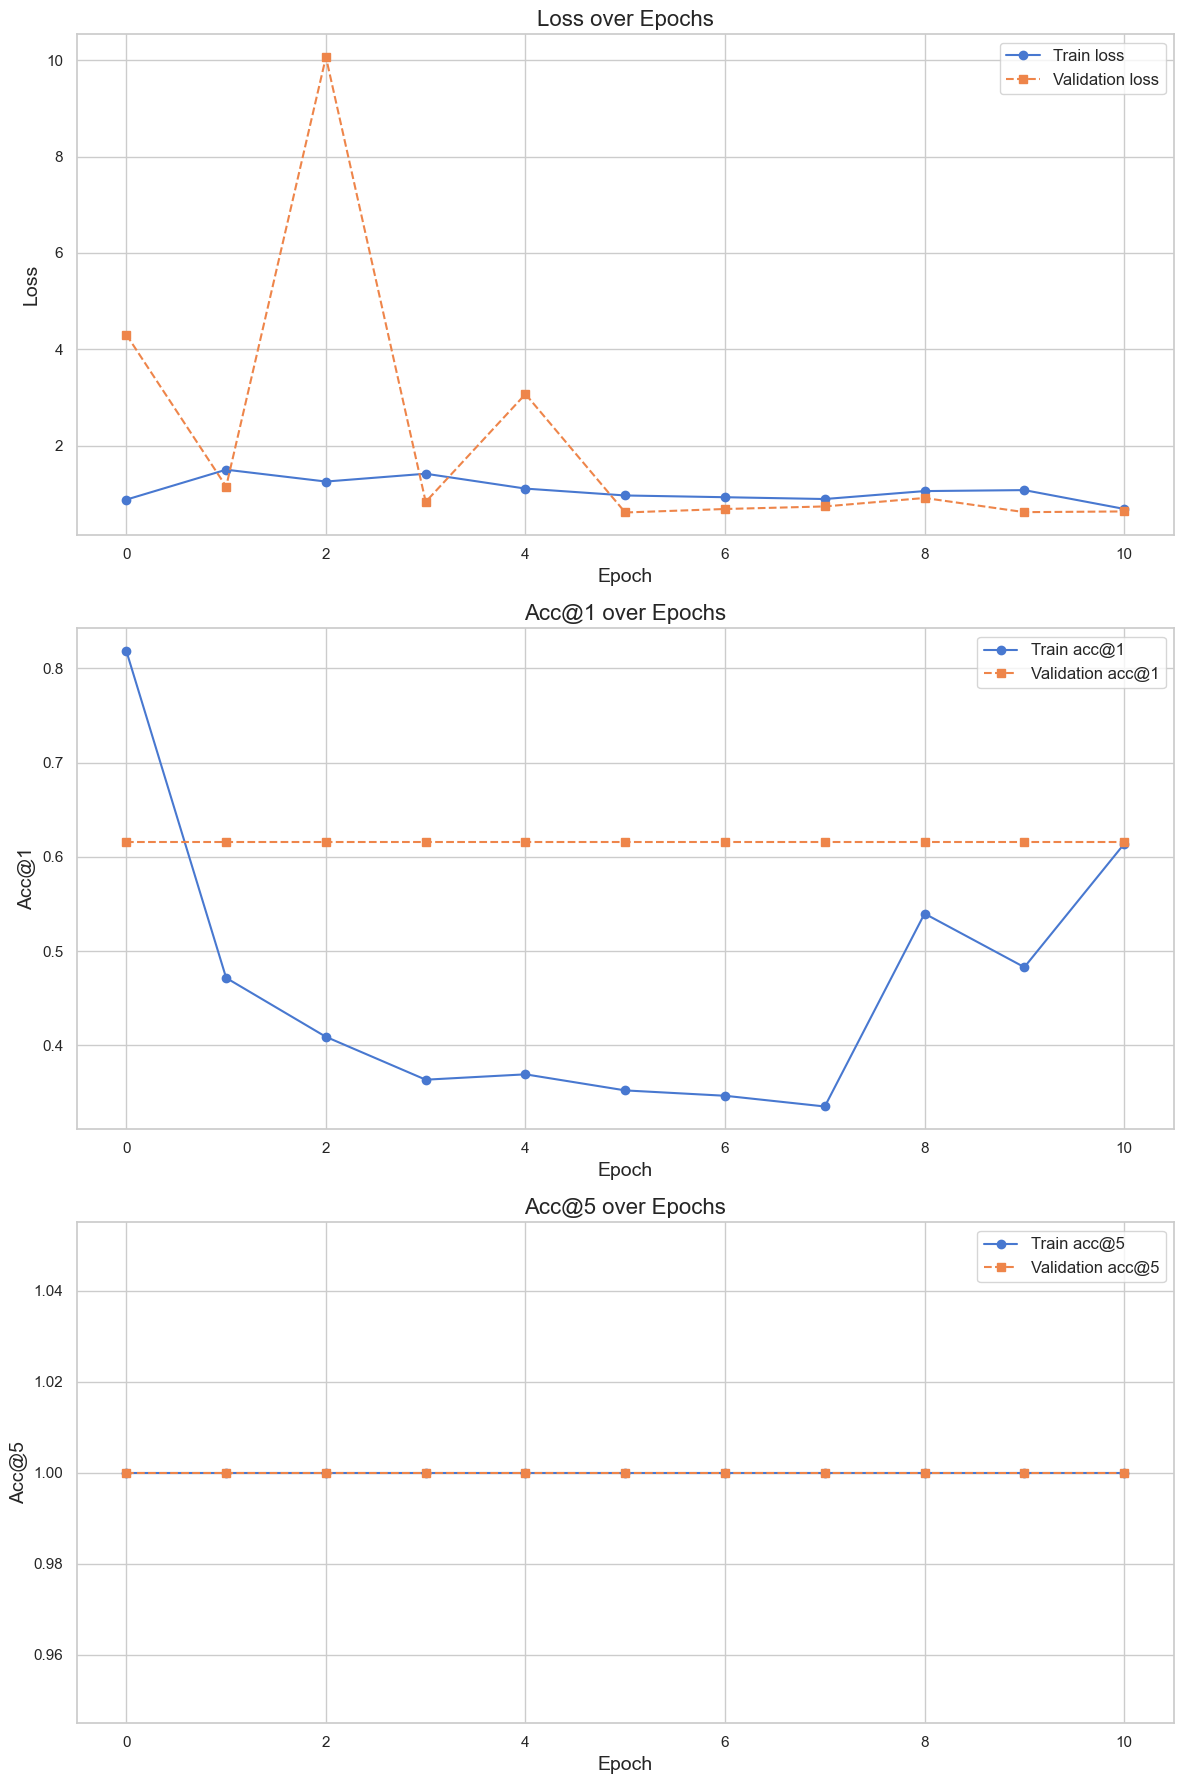

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data
epochs = []
train_metrics = {'loss': [], 'acc@1': [], 'acc@5': []}
val_metrics = {'loss': [], 'acc@1': [], 'acc@5': []}

for epoch_data in ml_resp['data']:
    epochs.append(epoch_data['epoch'])
    for detail in epoch_data['epochDetails']:
        metric_name = detail['metricName']
        metric_value = detail['metricValue']
        split_type = detail['splitType']
        
        if split_type == 'train':
            train_metrics[metric_name].append(metric_value)
        elif split_type == 'val':
            val_metrics[metric_name].append(metric_value)

# Set plot style
sns.set(style="whitegrid")

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

colors = sns.color_palette("muted")
markers = ['o', 's', 'D']

for idx, metric in enumerate(['loss', 'acc@1', 'acc@5']):
    axs[idx].plot(epochs, train_metrics[metric], label=f'Train {metric}', color=colors[0], marker=markers[0], linestyle='-')
    axs[idx].plot(epochs, val_metrics[metric], label=f'Validation {metric}', color=colors[1], marker=markers[1], linestyle='--')
    axs[idx].set_xlabel('Epoch', fontsize=14)
    axs[idx].set_ylabel(metric.capitalize(), fontsize=14)
    axs[idx].legend(fontsize=12)
    axs[idx].set_title(f'{metric.capitalize()} over Epochs', fontsize=16)
    axs[idx].grid(True)

plt.tight_layout()
plt.show()